# Deuxième partie

1. Importez le dataset diabetes de la librairie sklearn.
2. Sauvegardez la partie data du dataset dans un premier tableau et la partie target dans un
deuxième.
3. À partir du tableau contenant la partie data, extrayez la colonne qui correspond au BMI des
patients.

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
data = diabetes['data'][['bmi']]
target = diabetes['target']
data

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


<b> À partir de chaque tableau créé (un pour la partie data et un pour la partie target), formez un ensemble de test et un ensemble d’entraînement. L’ensemble d’entraînement doit contenir 80% des patients.</b>

https://realpython.com/train-test-split-python-data/

In [2]:
import random

len_data = len(data)
len_target = len(target)
train_percent = 0.8
train_size = int(train_percent * len_data)
combined = list(zip(data.values, target.values))
random.shuffle(combined)
data_shuffle,target_shuffle = zip(*combined)



In [3]:
train_data = data_shuffle[:train_size]
test_data = data_shuffle[train_size:]
train_target = target_shuffle[:train_size]
test_target = target_shuffle[train_size:]
np.array(train_data).reshape(-1,1)
np.array(test_data).reshape(-1,1)

array([[-0.0730303 ],
       [-0.03099563],
       [-0.02560657],
       [-0.03099563],
       [ 0.00026092],
       [-0.046085  ],
       [ 0.06169621],
       [-0.05039625],
       [ 0.05415152],
       [ 0.07139652],
       [-0.02345095],
       [-0.03530688],
       [ 0.04121778],
       [ 0.05522933],
       [-0.03530688],
       [-0.02021751],
       [ 0.04552903],
       [ 0.06061839],
       [-0.04500719],
       [ 0.00672779],
       [-0.00620595],
       [-0.02237314],
       [-0.00836158],
       [-0.04069594],
       [ 0.02397278],
       [-0.01375064],
       [-0.05362969],
       [ 0.06169621],
       [ 0.01966154],
       [-0.00836158],
       [ 0.04229559],
       [-0.06117437],
       [-0.046085  ],
       [ 0.04552903],
       [-0.03961813],
       [ 0.09403057],
       [ 0.0164281 ],
       [-0.01698407],
       [-0.05147406],
       [-0.08380842],
       [-0.00405033],
       [ 0.03690653],
       [ 0.02073935],
       [-0.05578531],
       [-0.05794093],
       [ 0

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, shuffle=True)
# random_state=4

In [6]:
data_train

,bmi
171,-0.046085
258,-0.024529
194,-0.059019
41,-0.067641
355,-0.009439
...,...
393,-0.046085
352,-0.071952
63,-0.037463
405,0.123131


In [7]:
target_train

171     74.0
258     89.0
194     86.0
41      55.0
355     60.0
       ...  
393     69.0
352     77.0
63     128.0
405    281.0
387    201.0
Name: target, Length: 353, dtype: float64

### Attention : les indices doivent correspondre

In [8]:
data_test

,bmi
246,-0.032073
324,0.005650
272,0.006728
113,0.014272
39,0.014272
...,...
433,-0.060097
413,-0.000817
288,-0.016984
365,-0.038540


In [9]:
target_test

246     78.0
324    249.0
272    182.0
113    297.0
39      90.0
       ...  
433     72.0
413    113.0
288     80.0
365    206.0
93      96.0
Name: target, Length: 89, dtype: float64

### Entraînez un modèle de régression linéaire sur l’ensemble d’entraînement grâce à la fonction LinearRegression() du module linear_model de la librairie sklearn.

• Quelle est la forme générale d’une droite de régression?

• Pour cet exercice, quelle est l’équation de la droite de régression?

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(data_train, target_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
model.coef_

array([947.70479382])

In [13]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [947.70479382]
Intercept: 152.530449337089


In [14]:
predictions = model.predict(data_test)

### L'équation de la droite :

y = a * x + b

y = 943.9 * x + 152.1

# R2 score

In [15]:
score = model.score(data_test, target_test)
print("R^2 score:", score)

R^2 score: 0.39016355774999434


# MSE

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt


mse = mean_squared_error(target_test, predictions)
mse


3598.8511014714545

In [17]:
sqrt(mse)

59.99042508160327

### Que pouvez-vous remarquer par rapport à l’erreur empirique calculée sur les données d’entraînement

In [18]:
predictions = model.predict(data_train)

mse = mean_squared_error(target_train, predictions)
mse

3964.183309387966

## Graph
Vérifiez visuellement que le modèle créé colle bien aux données d’entraînement et aux données de test. Pour cela, vous pouvez afficher le nuage de points représentant les données d’entraînement ainsi que celui représentant les données de test sur un même graphique, puis y ajouter la droite de régression (grâce à son équation au point 5).


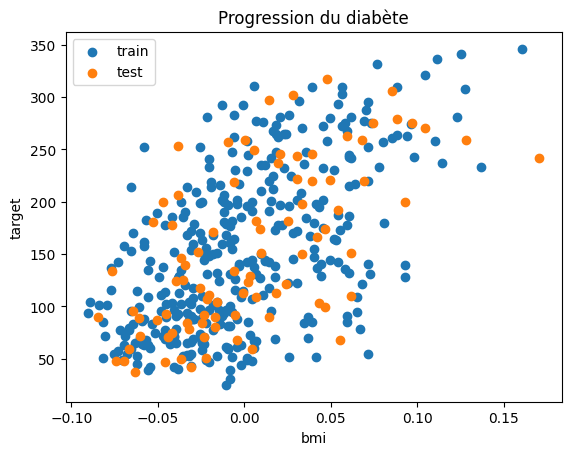

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data_train, target_train, label='train')
plt.scatter(data_test, target_test, label='test')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.title('Progression du diabète')
plt.show()

/root/notebooks/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


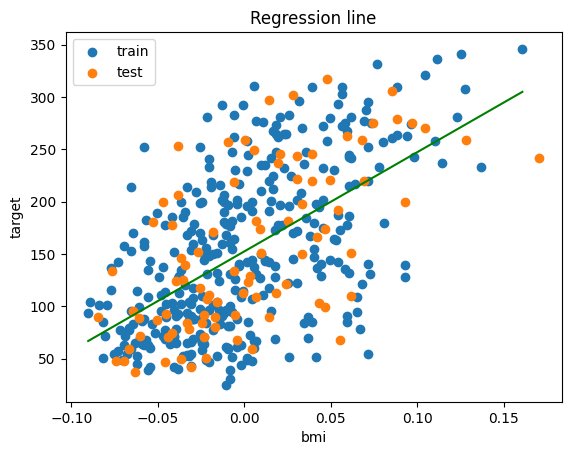

In [20]:
import numpy as np

line_x = np.linspace(data_train.min(), data_train.max(), 100)
line_y = model.predict(line_x)
plt.plot(line_x, line_y, color='green')

plt.scatter(data_train, target_train, label='train')
plt.scatter(data_test, target_test, label='test')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.title('Regression line')
plt.show()

# ALL FEATURES

Lors de l’exercice précédent, uniquement la feature concernant le BMI des patients a été considérée et l’erreur empirique obtenue sur l’ensemble de test est assez élevée. Pour produire de meilleurs résultats, un modèle de Machine Learning a donc besoin de plus d’informations. Dès lors, entraînez un deuxième modèle de régression en considérant l’ensemble des features fournies par le dataset diabetes.

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
data = diabetes['data']
target = diabetes['target']


In [ ]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, shuffle=True)


In [ ]:
data_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
310,-0.005515,-0.044642,0.064930,0.035644,-0.001569,0.014970,-0.013948,0.000729,-0.018114,0.032059
30,-0.060003,-0.044642,0.044451,-0.019442,-0.009825,-0.007577,0.022869,-0.039493,-0.027129,-0.009362
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
57,-0.027310,-0.044642,-0.063330,-0.050427,-0.089630,-0.104340,0.052322,-0.076395,-0.056153,-0.067351
...,...,...,...,...,...,...,...,...,...,...
204,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622
174,0.016281,0.050680,0.009961,-0.043542,-0.096510,-0.094632,-0.039719,-0.039493,0.017036,0.007207
266,-0.052738,0.050680,-0.062252,0.011544,-0.008449,-0.036700,0.122273,-0.076395,-0.086827,0.003064
274,0.016281,-0.044642,-0.024529,0.035644,-0.007073,-0.003193,-0.013948,-0.002592,0.015568,0.015491


In [ ]:
model.fit(data_train, target_train)
predictions = model.predict(data_test)

In [ ]:
predictions

array([185.94512825, 182.05144195, 262.57922795, 126.58581441,
        63.71240698, 207.62462902, 208.80200253, 110.04059713,
       259.03683828, 178.1363552 , 229.20192214, 126.86337418,
       144.02174297, 135.58787427, 179.56032472, 156.69560378,
       168.71475667, 101.36285586,  49.24404005,  50.43875202,
       139.12462578, 153.21147606, 168.47690953, 142.98596428,
       210.40269947, 163.75037926, 154.50450352, 186.54473699,
        52.34316134, 173.97810616, 111.32807358, 171.4189271 ,
       158.65898432, 176.72729434, 213.88575802, 171.02778008,
       107.1064994 , 128.6795532 , 118.92170518,  98.48601062,
        73.37376619,  86.15694436,  55.53620612, 167.65466116,
       106.46688045, 104.80674349, 192.81927382,  86.05096828,
       175.04732207,  79.19615814, 143.92929098,  89.47781333,
       160.72608886, 176.48941284, 100.60664492, 225.92471651,
       150.16440278, 167.85029617,  58.4691272 , 167.06555499,
       231.00976585,  66.92721217, 201.46193158, 236.19

### Note: now we have one coefficient per feature

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  -1.53063018 -216.89382199  496.6522116   320.38095777 -615.27306677
  382.22298978  -21.70226233  115.21340071  687.2019871    64.89615708]
Intercept: 153.76417939971606


### R^2 score is much higher

In [ ]:
score = model.score(data_test, target_test)
print("R^2 score:", score)

: 

# Remarque : 

Un modèle de régression linéaire est approprié pour approximer des données qui ont un
comportement linéaire mais ce n’est pas toujours le cas. Si les données suivent un autre comportement,
des modèles polynomiaux de plus haut degrés peuvent être plus adaptés. 